Wrapper (serial)

In [1]:
%%writefile src/sms.sh

#!/bin/bash
LOG_FILE="logs/sms.st"
strace -f -tt -T -r -y -o "$LOG_FILE" "$@"

Overwriting src/sms.sh


In [2]:
!chmod +x src/sms.sh

Usage

In [3]:
%%bash
./src/sms.sh ls

-e
00-prepare-eg.ipynb
01A-dev-StraceLineReader.ipynb
01B-dev-Preprocessor.ipynb
01C-dev-Miner.ipynb
02-dev-IOMinerV1.ipynb
02-test-IOMinerV1.ipynb
03-dev-IOMinerV2.ipynb
03-test-IOMinerV2.ipynb
04-dev-IOMinerV3.ipynb
04-test-IOMinerV3.ipynb
05-sm-wrapper.ipynb
05-test-wrapper.ipynb
06-dev-IOMinerV4.ipynb
06-test-IOMinerV4.ipynb
07-dev-DFGVisualizer.ipynb
07-test-DFGVisualizer.ipynb
Digraph.gv
Digraph.gv.png
X1-pm4py-dfg.ipynb
data
graph
logs
old
src


In [4]:
from strace_miner.miner import IOMinerV3
from strace_miner.preprocessor import IOLineReaderV2

io_calls = ['read','write']
line_reader = IOLineReaderV2(['/workspaces/',],collapse=False)
sta = IOMinerV3(["logs/sms.st",],io_calls,line_reader)
sta.preprocess()
sta.prepare_summaries_and_event_log()
sta.prepare_dfg()
sta.activities_summary['sms']

CSV log path: logs/sms.csv


/home/vscode/.local/lib/python3.12/site-packages/pm4py/utils.py:538: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


,call,duration,percent
0,"[read, [<4KB], /lib/x86_64-linux-gnu]",0.000181,0.716690
1,"[read, [<4KB], /proc/filesystems]",0.000144,0.570184
2,"[read, [<4KB], /usr/lib]",0.000053,0.209859
3,"[read, [<4MB], /etc/locale.alias]",0.000060,0.237577
4,"[write, [<4KB], pipe:[766394]]",0.000080,0.316769


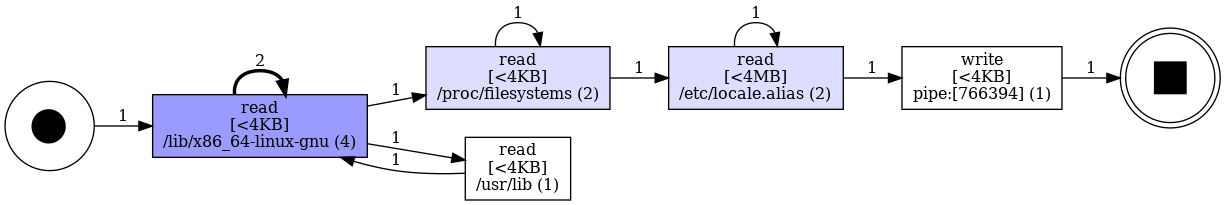

In [5]:
sta.view_dfg()

Wrapper (parallel)

In [6]:
%%writefile src/smp.sh

#!/bin/bash
LOG_FILE="logs/$1_$(hostname)_$$.st"
echo $LOG_FILE
strace -f -tt -T -r -y -o "$LOG_FILE" "$@"

Overwriting src/smp.sh


In [7]:
!chmod +x src/smp.sh

Usage

In [8]:
%%bash
./src/smp.sh lscpu

logs/lscpu_a65243794be3_55478.st
Architecture:                       x86_64
CPU op-mode(s):                     32-bit, 64-bit
Byte Order:                         Little Endian
Address sizes:                      39 bits physical, 48 bits virtual
CPU(s):                             16
On-line CPU(s) list:                0-15
Thread(s) per core:                 2
Core(s) per socket:                 8
Socket(s):                          1
Vendor ID:                          GenuineIntel
CPU family:                         6
Model:                              154
Model name:                         12th Gen Intel(R) Core(TM) i7-1260P
Stepping:                           3
CPU MHz:                            2496.011
BogoMIPS:                           4992.02
Virtualization:                     VT-x
Hypervisor vendor:                  Microsoft
Virtualization type:                full
L1d cache:                          384 KiB
L1i cache:                          256 KiB
L2 cache:        

In [9]:
!mpiexec -n 2 bash src/smp.sh ls

logs/ls_a65243794be3_55492.st
logs/ls_a65243794be3_55493.st
-e				04-dev-IOMinerV3.ipynb	     Digraph.gv.png
00-prepare-eg.ipynb		04-test-IOMinerV3.ipynb      X1-pm4py-dfg.ipynb
01A-dev-StraceLineReader.ipynb	05-sm-wrapper.ipynb	     data
01B-dev-Preprocessor.ipynb	05-test-wrapper.ipynb	     graph
01C-dev-Miner.ipynb		06-dev-IOMinerV4.ipynb	     logs
02-dev-IOMinerV1.ipynb		06-test-IOMinerV4.ipynb      old
-e				04-dev-IOMinerV3.ipynb	     Digraph.gv.png
02-test-IOMinerV1.ipynb		07-dev-DFGVisualizer.ipynb   src
00-prepare-eg.ipynb		04-test-IOMinerV3.ipynb      X1-pm4py-dfg.ipynb
03-dev-IOMinerV2.ipynb		07-test-DFGVisualizer.ipynb
01A-dev-StraceLineReader.ipynb	05-sm-wrapper.ipynb	     data
03-test-IOMinerV2.ipynb		Digraph.gv
01B-dev-Preprocessor.ipynb	05-test-wrapper.ipynb	     graph
01C-dev-Miner.ipynb		06-dev-IOMinerV4.ipynb	     logs
02-dev-IOMinerV1.ipynb		06-test-IOMinerV4.ipynb      old
02-test-IOMinerV1.ipynb		07-dev-DFGVisualizer.ipynb   src
03-dev-IOMinerV2.ipynb		07-test-DFGV

In [10]:
!strace -tt -y ls

12:49:26.325673 execve("/bin/ls", ["ls"], 0x7fff2cd1d310 /* 59 vars */) = 0
12:49:26.326129 brk(NULL)               = 0x56315354b000
12:49:26.326320 access("/etc/ld.so.preload", R_OK) = -1 ENOENT (No such file or directory)
12:49:26.326522 openat(AT_FDCWD, "/etc/ld.so.cache", O_RDONLY|O_CLOEXEC) = 3</etc/ld.so.cache>
12:49:26.326681 fstat(3</etc/ld.so.cache>, {st_mode=S_IFREG|0644, st_size=39386, ...}) = 0
12:49:26.326787 mmap(NULL, 39386, PROT_READ, MAP_PRIVATE, 3</etc/ld.so.cache>, 0) = 0x7fb5ffd8b000
12:49:26.327000 close(3</etc/ld.so.cache>) = 0
12:49:26.327153 openat(AT_FDCWD, "/lib/x86_64-linux-gnu/libselinux.so.1", O_RDONLY|O_CLOEXEC) = 3</lib/x86_64-linux-gnu/libselinux.so.1>
12:49:26.327304 read(3</lib/x86_64-linux-gnu/libselinux.so.1>, "\177ELF\2\1\1\0\0\0\0\0\0\0\0\0\3\0>\0\1\0\0\0\220}\0\0\0\0\0\0"..., 832) = 832
12:49:26.327395 fstat(3</lib/x86_64-linux-gnu/libselinux.so.1>, {st_mode=S_IFREG|0644, st_size=166120, ...}) = 0
12:49:26.327545 mmap(NULL, 8192, PROT_READ|PROT_WR